In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
left_image = cv.imread('/Users/jeste/Pictures/Screenshots/my_frst_webots_world_2.png', cv.IMREAD_GRAYSCALE)
right_image = cv.imread('/Users/jeste/Pictures/Screenshots/my_frst_webots_world_3.png', cv.IMREAD_GRAYSCALE)

rleft_image = cv.rotate(left_image, cv.ROTATE_90_CLOCKWISE)
rright_image = cv.rotate(right_image, cv.ROTATE_90_CLOCKWISE)

In [4]:
stereo = cv.StereoBM_create(numDisparities=80, blockSize = 27)
#stereo.setPreFilterType(cv.STEREO_BM_PREFILTER_XSOBEL)

In [5]:
def depth():
  return stereo.compute(left_image, right_image)

def depth2(image1, image2):
  return stereo.compute(image1, image2)

In [6]:
import timeit
from statistics import mean
#buscar el minimo para el blocksize
medias = []

for i in range(5, 256, 2):
  stereo = cv.StereoBM_create(numDisparities=16, blockSize = i)
  tiempos = []
  for _ in range(100):
    time = timeit.timeit(depth, number=1)
    tiempos.append(time)
  medias.append(mean(tiempos))

print(medias)

[0.011189862999672187, 0.011095724999831873, 0.010182337000005646, 0.009776483999667107, 0.008792156999770668, 0.008573847999723511, 0.008891132000280777, 0.00819407000002684, 0.008443081999575951, 0.007258891000092262, 0.007709948999618064, 0.006781725999899208, 0.008292789000261109, 0.008926086999854305, 0.008068425999663304, 0.007596905999671435, 0.008016216000396526, 0.008051517999992939, 0.008941401999691153, 0.010478379000051063, 0.010421130999966409, 0.01027115800025058, 0.01087133199944219, 0.010556999000546057, 0.010620940000517293, 0.010646488999555004, 0.010495612000013352, 0.011496601999970152, 0.011445243999987724, 0.010820359000281315, 0.010608662000231561, 0.010988951000617817, 0.01091651200011256, 0.010656372999656015, 0.010593355000019074, 0.010633825999684631, 0.010930736999580404, 0.010655812000477454, 0.010752989999527927, 0.019495888000237757, 0.02020822500016948, 0.021110323999819228, 0.019476549000100932, 0.019526829999595065, 0.019555828999364165, 0.019389440000

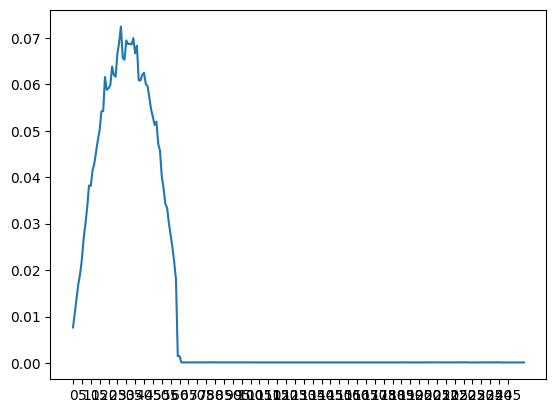

<Figure size 5000x5000 with 0 Axes>

In [26]:
from matplotlib import pyplot as plt

x = np.arange(0, 250, 5)  # Valores del eje x con un paso de 1 unidad
y = np.random.randint(0, 10, 10)  # Datos para el eje y

# Trazar los datos
plt.xticks(x)
plt.plot(medias)
plt.figure(figsize=(50, 50))



plt.show()

In [28]:
medias.index(min(medias))

209

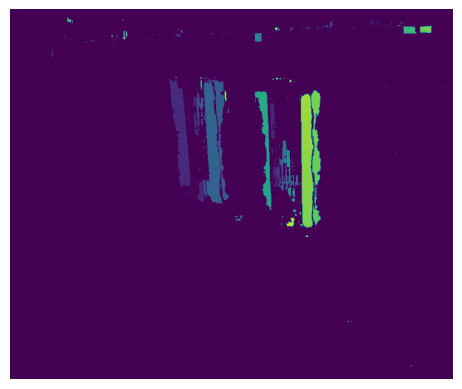

In [6]:
plt.imshow(depth2(left_image, right_image))
plt.axis('off')
plt.show()

In [27]:
imagen1 = depth2(left_image, right_image)
imagen2 = cv.rotate(depth2(rleft_image, rright_image), cv.ROTATE_90_COUNTERCLOCKWISE)

def mezcla(imagen1, imagen2):
    imagen_mezcla = np.zeros(imagen1.shape)
    for i in range(imagen1.shape[0]):
        for j in range(imagen1.shape[1]):
            imagen_mezcla[i, j] = max(imagen1[i, j], imagen2[i, j])
    return imagen_mezcla

In [53]:
def mezcla2(imagen1, imagen2):
    return np.maximum(imagen1, imagen2)

In [28]:
a = mezcla(imagen1, imagen2)

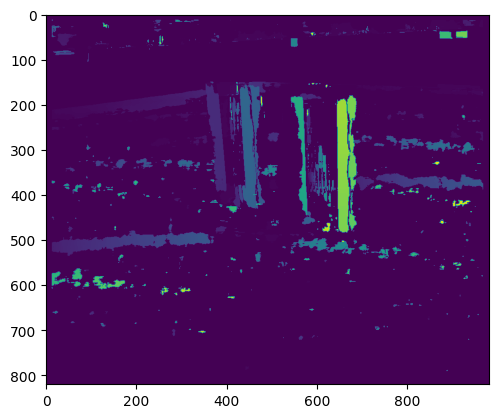

In [34]:
#type(imagen1)
plt.imshow(a)

In [54]:
def basic_depth(image1, image2):
    rotated_image1 = cv.rotate(image1, cv.ROTATE_90_CLOCKWISE)
    rotated_image2 = cv.rotate(image2, cv.ROTATE_90_CLOCKWISE)
    
    depth_image1 = depth2(image1, image2)
    depth_image2 = cv.rotate(depth2(rotated_image1, rotated_image2), cv.ROTATE_90_COUNTERCLOCKWISE)
    
    return mezcla2(depth_image1, depth_image2)

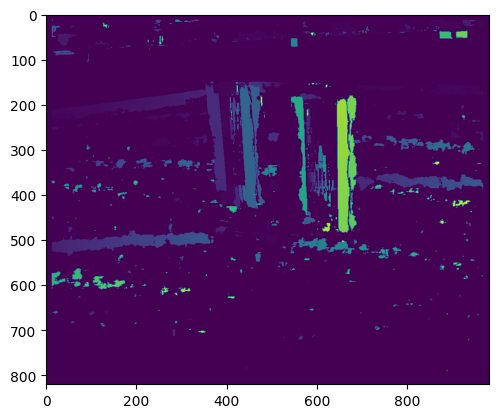

In [55]:
imagen_final = basic_depth(left_image, right_image)
plt.imshow(imagen_final)

In [56]:
import timeit
tiempo = timeit.timeit(lambda: basic_depth(left_image, right_image), number=1)
print(tiempo)

0.04179190000286326


In [52]:
type(imagen1)

numpy.ndarray